<a href="https://colab.research.google.com/github/josepharamos/Youtube_Top1000_Dashboard/blob/main/youtube_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipywidgets plotly --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
pip install streamlit pandas matplotlib sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [ ]:
# Allow Google Colab to access your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Upload youtube.db
from google.colab import files
uploaded = files.upload()

Saving youtube.db to youtube (2).db


In [ ]:
# Set Working Directory
# The Directory should match the exact directory/folder that contains the "youtube.db" file
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Personal/Youtube Project')

Total Channels: 1000
Avg Subscribers: 28,403,698
Avg Views: 13,174,052,716


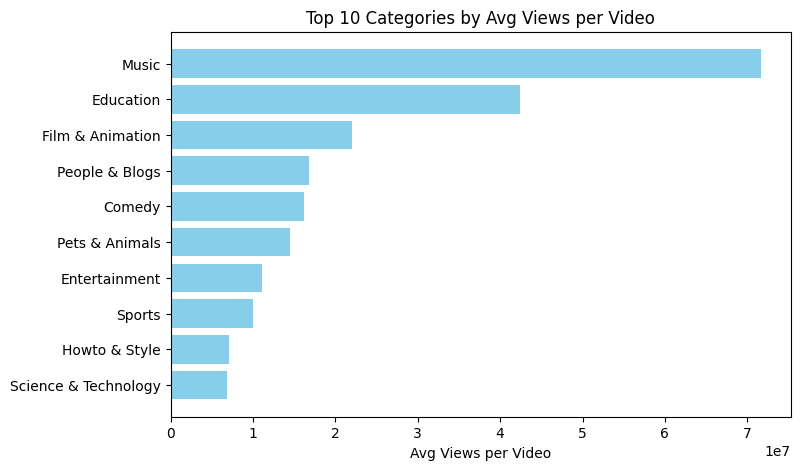

interactive(children=(Dropdown(description='Category:', options=('All', 'Autos & Vehicles', 'Comedy', 'Educati…

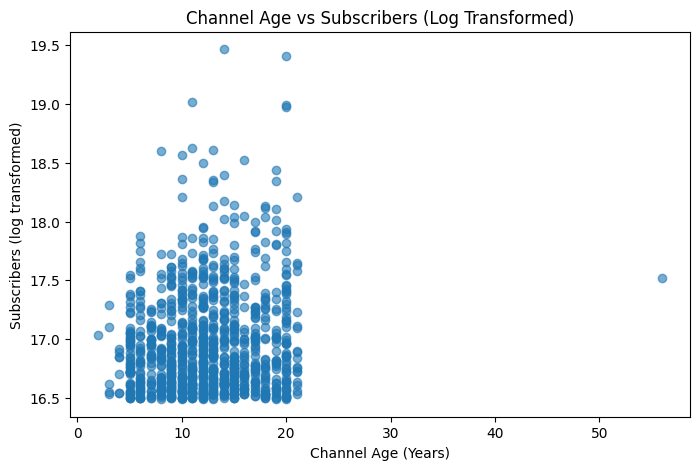

In [ ]:
import sqlite3
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown
from IPython.display import display

# ----------------------------------
# Youtube Top 100 Dashboard in Colab
# ----------------------------------

# --- Load Data ---
conn = sqlite3.connect("youtube.db")

category_df = pd.read_sql("SELECT * FROM category_summary", conn)
efficiency_df = pd.read_sql("SELECT * FROM efficiency_metrics", conn)
age_df = pd.read_sql("SELECT * FROM age_performance", conn)

conn.close()

# --- KPIS Summary ---
total_channels = category_df["channel_count"].sum()
avg_subs = category_df["avg_subscribers"].mean()
avg_views = category_df["avg_views"].mean()

print(f"Total Channels: {total_channels}")
print(f"Avg Subscribers: {int(avg_subs):,}")
print(f"Avg Views: {int(avg_views):,}")

# --- Category Performance Chart ---
top_cats = category_df.dropna(subset=['Category']).sort_values("avg_views_per_video", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_cats["Category"], top_cats["avg_views_per_video"], color='skyblue')
plt.xlabel("Avg Views per Video")
plt.title("Top 10 Categories by Avg Views per Video")
plt.gca().invert_yaxis()
plt.show()

# --- Interactive Top Efficiency Table ---

categories = ["All"] + sorted(efficiency_df["Category"].dropna().unique().tolist())

def show_top_efficiency(selected_category):
    if selected_category == "All":
        df = efficiency_df.copy()
    else:
        df = efficiency_df[efficiency_df["Category"] == selected_category]
    top_eff = df.sort_values("avg_views_per_video", ascending=False).head(20)
    display(top_eff[["Youtuber", "Category", "Subscribers", "Video Views", "Video Count", "avg_views_per_video"]])

interact(show_top_efficiency, selected_category=Dropdown(options=categories, description='Category:'))

top_eff = efficiency_df.sort_values("avg_views_per_video", ascending=False).head(20)
top_eff[["Youtuber", "Category", "avg_views_per_video", "Subscribers"]]

plt.figure(figsize=(8,5))
plt.scatter(age_df["channel_age"], np.log1p(age_df["Subscribers"]), alpha=0.6)
plt.xlabel("Channel Age (Years)")
plt.ylabel("Subscribers (log transformed)")
plt.title("Channel Age vs Subscribers (Log Transformed)")
plt.show()